In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
covid_df = pd.read_csv('data/covid_df.csv', sep=',', decimal='.')

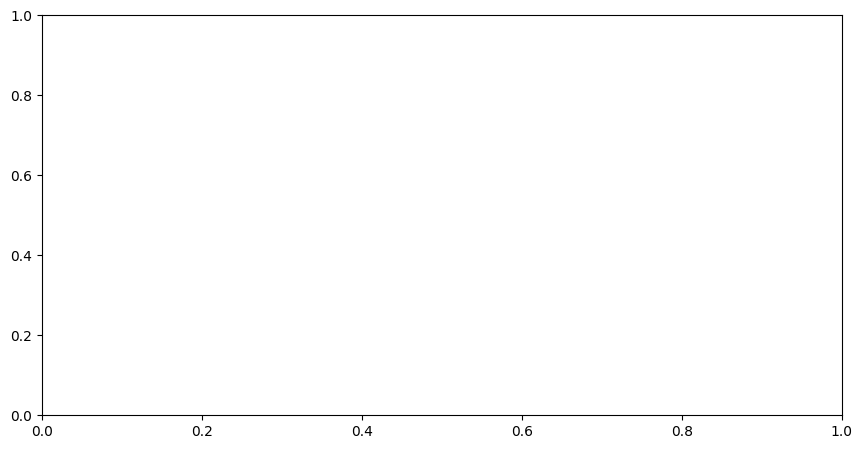

In [15]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

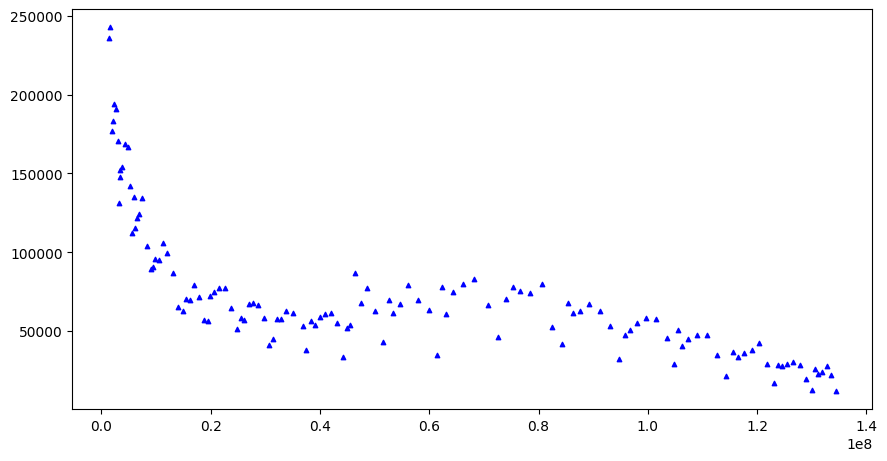

In [33]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=10,
    c='blue',
    marker='^'
)


([<matplotlib.patches.Wedge at 0x2b208292d30>,
 [Text(0.7665420934957, 0.9232622698341083, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.5931469540063179, 0.9263782655875661, 'Oxford/AstraZeneca'),
  Text(-1.0669756518152362, 0.26751253883407417, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.9691397141646498, -0.5203539318856552, 'Oxford/AstraZeneca, Sinopharm/Beijing'),
  Text(-0.42855913880528995, -1.013082950476647, 'Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(0.162764772670222, -1.0878913680959192, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(0.6404448584916131, -0.894332367317463, 'Moderna, Pfizer/BioNTech'),
  Text(0.9150658010408986, -0.610454404329577, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'),
  Text(1.03477305208093, -0.3731551027215323, 'Pfizer/BioNTech'),
  Text(1.092724197741022, -0.126308462389659, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')],
 [Text(0.4471495545391

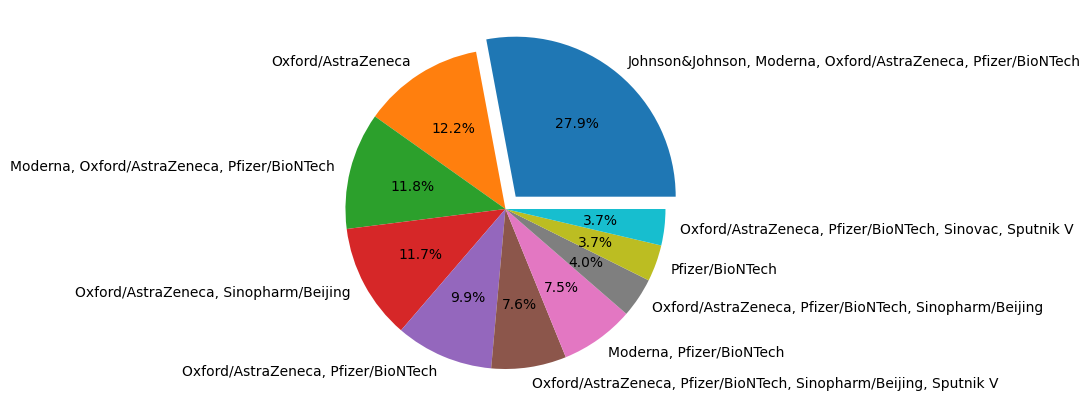

In [46]:
vaccines_combination = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines_combination,
    labels = vaccines_combination.index,
    autopct='%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
)